In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Label indices on DataFrames and Series

When we create a Pandas DataFrame or Series object there is always an associated "index" that labels the axes of the DataFrame or Series.  I'll refer to the values of these labels as "label indices" to disambiguate them from the standard positional indices that we're used to when working with Python data structures such as lists and arrays.

If you don't specify specific label indices, than Pandas will generate a default set of label indices for you:

In [2]:
df1 = pd.DataFrame({
 "chromosome": [1, 2, 3, 3],
 "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]   
})

df1

,chromosome,gene
0,1,YFG1
1,2,YFG2
2,3,YFG3
3,3,YFG4


In [4]:
df1.index  # get the label indices associated with the data frame that are on the leftest in the chart

RangeIndex(start=0, stop=4, step=1)

A Slice generated by taking a single column of a DataFrame shares the same indices:

In [5]:
df1.gene

0    YFG1
1    YFG2
2    YFG3
3    YFG4
Name: gene, dtype: object

If you want to specify your own indices, use the `index` argument when constructing the data frame:

In [17]:
df1 = pd.DataFrame({
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]},
    index = ["a","b","c","d"])

df1

,chromosome,gene
a,1,YFG1
b,2,YFG2
c,3,YFG3
d,3,YFG4


In [18]:
df1.gene 

a    YFG1
b    YFG2
c    YFG3
d    YFG4
Name: gene, dtype: object

### Label indices are not necessarily unique

In [19]:
df1a = pd.DataFrame({
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]},
    index = ["a","b","c","a"])

df1a

,chromosome,gene
a,1,YFG1
b,2,YFG2
c,3,YFG3
a,3,YFG4


In [25]:
df1a.loc["a",:]

,chromosome,gene
a,1,YFG1
a,3,YFG4


In [32]:
df1aa = pd.DataFrame({
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"],
    "discoverer": ["Smith", "Doe", "Smith", "Martinez"]
    },
    index = ["a","b","c","a"])

df1aa

,chromosome,gene,discoverer
a,1,YFG1,Smith
b,2,YFG2,Doe
c,3,YFG3,Smith
a,3,YFG4,Martinez


In [35]:
x = df1aa.groupby(["chromosome", "discoverer"]).gene.count()

In [36]:
x.loc[(3, "Smith")]

1

## Label indices are used when you combine information from different data frames

In [37]:
df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]
    },
)

df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
    "description": ["Function X", "Function Y", "Function Z", ""],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
    },
)

In [38]:
df1

,chromosome,gene
0,1,YFG1
1,2,YFG2
2,3,YFG3
3,3,YFG4


In [39]:
df2

,gene,description,reference
0,YFG4,Function X,Smith et al. 2010
1,YFG2,Function Y,Magwene 2020
2,YFG3,Function Z,Doe 1984
3,YFG1,,Botstein 2013


### What happens if we try and combine these data frames naively?

In [40]:
df1["description"] = df2.description  ## works but gives wrong alignment!
df1

,chromosome,gene,description
0,1,YFG1,Function X
1,2,YFG2,Function Y
2,3,YFG3,Function Z
3,3,YFG4,


In [41]:
# what happens if data frames have different indices?

df2alpha = pd.DataFrame({
 "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
 "description": ["Function X", "Function Y", "Function Z", ""],
 "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
},
index=["a","b","c","d"])

df2alpha

,gene,description,reference
a,YFG4,Function X,Smith et al. 2010
b,YFG2,Function Y,Magwene 2020
c,YFG3,Function Z,Doe 1984
d,YFG1,,Botstein 2013


In [42]:
df1["description"] = df2alpha.description  ## works but gives empty values
df1

,chromosome,gene,description
0,1,YFG1,NaN
1,2,YFG2,NaN
2,3,YFG3,NaN
3,3,YFG4,NaN


### setting the index after creation

In [51]:
df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]
    },
)

df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
    "description": ["Function X", "Function Y", "Function Z", ""],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
    },
)

In [52]:
df1 = df1.set_index(df1.gene)
df1

,chromosome,gene
gene,,
YFG1,1,YFG1
YFG2,2,YFG2
YFG3,3,YFG3
YFG4,3,YFG4


In [53]:
df1a = df1.set_index("gene")
df1a
# can also do "gene" but df1.gene better for computational purposes

,chromosome
gene,
YFG1,1
YFG2,2
YFG3,3
YFG4,3


In [54]:
df2 = df2.set_index(df2.gene)
df2

,gene,description,reference
gene,,,
YFG4,YFG4,Function X,Smith et al. 2010
YFG2,YFG2,Function Y,Magwene 2020
YFG3,YFG3,Function Z,Doe 1984
YFG1,YFG1,,Botstein 2013


In [55]:
df1["description"] = df2["description"]
df1

,chromosome,gene,description
gene,,,
YFG1,1,YFG1,
YFG2,2,YFG2,Function Y
YFG3,3,YFG3,Function Z
YFG4,3,YFG4,Function X


## Merging DataFrames

In [71]:
# shortcut for doing exactly this, where don't have to explicitly create new indices

df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]
    },
)

df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
    "description": ["Function X", "Function Y", "Function Z", ""],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
    },
)

In [74]:
pd.merge(df1, df2, on="gene")

,chromosome,gene,description,reference
0,1,YFG1,,Botstein 2013
1,2,YFG2,Function Y,Magwene 2020
2,3,YFG3,Function Z,Doe 1984
3,3,YFG4,Function X,Smith et al. 2010


### Other types of joins

In [75]:
df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3, 4],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4", "YFG5"],
    },
)


df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1", "YFG9"],
    "description": ["Function X", "Function Y", "Function Z", "", "Function Q"],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013", "Dietrich 2004"]
    },
)

In [76]:
df1

,chromosome,gene
0,1,YFG1
1,2,YFG2
2,3,YFG3
3,3,YFG4
4,4,YFG5


In [77]:
df2

,gene,description,reference
0,YFG4,Function X,Smith et al. 2010
1,YFG2,Function Y,Magwene 2020
2,YFG3,Function Z,Doe 1984
3,YFG1,,Botstein 2013
4,YFG9,Function Q,Dietrich 2004


In [78]:
pd.merge(df1,df2,on="gene")  # by default merge takes "inner" join = intersection of keys from left and right df

,chromosome,gene,description,reference
0,1,YFG1,,Botstein 2013
1,2,YFG2,Function Y,Magwene 2020
2,3,YFG3,Function Z,Doe 1984
3,3,YFG4,Function X,Smith et al. 2010


In [79]:
pd.merge(df1, df2, on="gene", how="left") # "left" join = keys from left df

,chromosome,gene,description,reference
0,1,YFG1,,Botstein 2013
1,2,YFG2,Function Y,Magwene 2020
2,3,YFG3,Function Z,Doe 1984
3,3,YFG4,Function X,Smith et al. 2010
4,4,YFG5,NaN,NaN


In [80]:
pd.merge(df1, df2, on="gene", how="right") # "right" join = keys from right df

,chromosome,gene,description,reference
0,1.0,YFG1,,Botstein 2013
1,2.0,YFG2,Function Y,Magwene 2020
2,3.0,YFG3,Function Z,Doe 1984
3,3.0,YFG4,Function X,Smith et al. 2010
4,NaN,YFG9,Function Q,Dietrich 2004


In [81]:
pd.merge(df1, df2, on="gene", how="outer")  # "outer" join = union of keys

,chromosome,gene,description,reference
0,1.0,YFG1,,Botstein 2013
1,2.0,YFG2,Function Y,Magwene 2020
2,3.0,YFG3,Function Z,Doe 1984
3,3.0,YFG4,Function X,Smith et al. 2010
4,4.0,YFG5,NaN,NaN
5,NaN,YFG9,Function Q,Dietrich 2004


In [86]:
# many more merge types.
# to explore, use 'tab' after typing how=""

## Combining information on genome features and gene ontology

In [152]:
yeast = pd.read_csv("/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/SGD_features.tsv", delimiter="\t")
yeast

,SGDID,Type,Qualifier,Name,Gene,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description
0,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...
1,S000031098,CDS,NaN,NaN,NaN,NaN,YAL069W,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,NaN
2,S000028594,ORF,Dubious,YAL068W-A,NaN,NaN,chromosome 1,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,Dubious open reading frame; unlikely to encode...
3,S000031372,CDS,NaN,NaN,NaN,NaN,YAL068W-A,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,NaN
4,S000121252,ARS,NaN,ARS102,NaN,ARSI-1,chromosome 1,NaN,1,707.0,776.0,NaN,NaN,11/18/14,2014-11-18|2007-03-07,Autonomously Replicating Sequence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16449,S000029658,not in systematic sequence of S288C,NaN,MAL61,MAL61,MALT,NaN,L000001021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-affinity maltose transporter; narrow subs...
16450,S000145155,not in systematic sequence of S288C,NaN,FPG1,FPG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Putative cell wall mannoprotein involved in fo...
16451,S000133140,not in systematic sequence of S288C,NaN,XDH1,XDH1,NaN,chromosome 15,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,Xylitol dehydrogenase; involved in utilization...
16452,S000149345,not in systematic sequence of S288C,NaN,IMI1,IMI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Protein involved in maintaining mitochondrial ...


In [153]:
yeast.columns

Index(['SGDID', 'Type', 'Qualifier', 'Name', 'Gene', 'Alias', 'Parent',
       'Secondary', 'Chromosome', 'Start', 'Stop', 'Strand', 'GeneticPosition',
       'CoordVersion', 'SeqVersion', 'Description'],
      dtype='object')

In [154]:
clens = pd.read_csv("/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/chromosome_length.tsv", delimiter = "\t")
clens

,Chromosome,Systematic Name,Length
0,1,NC_001133,230218
1,2,NC_001134,813184
2,3,NC_001135,316620
3,4,NC_001136,1531933
4,5,NC_001137,576874
5,6,NC_001138,270161
6,7,NC_001139,1090940
7,8,NC_001140,562643
8,9,NC_001141,439888
9,10,NC_001142,745751


In [155]:
# to get the pretty picture relating to chrom. length and # of genes to find how "gene dense" a chromosome is

In [156]:
orfs = yeast[yeast.Type == "ORF"]
orfs.head()

,SGDID,Type,Qualifier,Name,Gene,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description
0,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...
2,S000028594,ORF,Dubious,YAL068W-A,NaN,NaN,chromosome 1,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,Dubious open reading frame; unlikely to encode...
9,S000002142,ORF,Verified,YAL068C,PAU8,seripauperin PAU8,chromosome 1,NaN,1,2169.0,1807.0,C,NaN,7/31/96,7/31/96,Protein of unknown function; member of the ser...
11,S000028593,ORF,Uncharacterized,YAL067W-A,NaN,NaN,chromosome 1,NaN,1,2480.0,2707.0,W,NaN,7/29/03,7/29/03,Putative protein of unknown function; identifi...
14,S000000062,ORF,Verified,YAL067C,SEO1,putative permease SEO1,chromosome 1,L000003363,1,9016.0,7235.0,C,NaN,2/3/11,7/31/96,Putative permease; member of the allantoate tr...


In [157]:
len(orfs)

6604

In [158]:
orfs.Chromosome.value_counts()
# has 2-micron chromosome
# this is where problem appeared that Chromosome became Object and not compatible wiht int64

4           836
15          597
7           583
12          578
16          511
13          505
2           456
14          435
10          398
11          348
5           323
8           321
9           241
3           184
6           139
1           117
17           28
2-micron      4
Name: Chromosome, dtype: int64

In [159]:
orfs.Chromosome.unique()
# Shows that Chromosome is Object String

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '2',
       '2-micron', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [160]:
orfcts = orfs[orfs.Chromosome != "2-micron"].Chromosome.value_counts()
orfcts
# w/o 2-micron chromosome

4     836
15    597
7     583
12    578
16    511
13    505
2     456
14    435
10    398
11    348
5     323
8     321
9     241
3     184
6     139
1     117
17     28
Name: Chromosome, dtype: int64

In [161]:
clens

,Chromosome,Systematic Name,Length
0,1,NC_001133,230218
1,2,NC_001134,813184
2,3,NC_001135,316620
3,4,NC_001136,1531933
4,5,NC_001137,576874
5,6,NC_001138,270161
6,7,NC_001139,1090940
7,8,NC_001140,562643
8,9,NC_001141,439888
9,10,NC_001142,745751


In [162]:
pd.merge(clens,orfcts, on="Chromosome")

,Chromosome,Systematic Name,Length


In [163]:
type(clens)

pandas.core.frame.DataFrame

In [164]:
type(orfcts)

pandas.core.series.Series

In [165]:
orfctsdf = pd.DataFrame({"NumGenes" : orfcts, "Chromosome" : orfcts.index.astype("int")})
orfctsdf

,NumGenes,Chromosome
4,836,4
15,597,15
7,583,7
12,578,12
16,511,16
13,505,13
2,456,2
14,435,14
10,398,10
11,348,11


In [166]:
clens.dtypes

Chromosome          int64
Systematic Name    object
Length              int64
dtype: object

In [167]:
orfctsdf.dtypes
# before casting through astype(""), Chromosmoe = object, now = int64

NumGenes      int64
Chromosome    int64
dtype: object

In [169]:
newlens = pd.merge(clens, orfctsdf, on="Chromosome")
newlens

,Chromosome,Systematic Name,Length,NumGenes
0,1,NC_001133,230218,117
1,2,NC_001134,813184,456
2,3,NC_001135,316620,184
3,4,NC_001136,1531933,836
4,5,NC_001137,576874,323
5,6,NC_001138,270161,139
6,7,NC_001139,1090940,583
7,8,NC_001140,562643,321
8,9,NC_001141,439888,241
9,10,NC_001142,745751,398


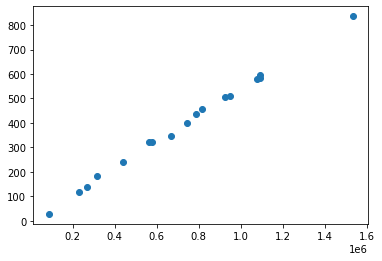

In [180]:
plt.scatter(newlens.Length, newlens.NumGenes)
#plt.xlabel("Chromosome Length")
#plt.ylabel("Number of Genes")
pass

## Yeast GO mapping files

go_slim_mapping.tab	This file is TAB delimited and contains the mapping of all yeast gene products (protein or RNA)
to a GO-Slim term.

```
1) ORF (mandatory) 		- Systematic name of the gene
2) Gene (optional) 		- Gene name, if one exists
3) SGDID (mandatory) 		- the SGDID, unique database identifier for the gene
4) GO_Aspect (mandatory) 	- which ontology: P=Process, F=Function, C=Component
5) GO Slim term (mandatory) 	- the name of the GO term that was selected as a GO Slim term
6) GOID (optional) 		- the unique numerical identifier of the GO term
7) Feature type (mandatory) 	- a description of the sequence feature, such as ORF or tRNA
```

In [139]:
gonames = ["ORF", "Gene", "SGDID", "GO_aspect", "GO_slim", "GO_ID", "Type"]
goterms = pd.read_table("/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/go_slim_mapping.tab", names=gonames,header=None)

In [85]:
goterms.shape

(42885, 7)

In [145]:
goterms.head(10)

,ORF,Gene,SGDID,GO_aspect,GO_slim,GO_ID,Type
0,HRA1,HRA1,S000119380,C,cellular_component,GO:0005575,ncRNA_gene
1,HRA1,HRA1,S000119380,F,molecular_function,GO:0003674,ncRNA_gene
2,HRA1,HRA1,S000119380,P,rRNA processing,GO:0006364,ncRNA_gene
3,HRA1,HRA1,S000119380,P,ribosomal small subunit biogenesis,GO:0042274,ncRNA_gene
4,ICR1,ICR1,S000132612,C,nucleus,GO:0005634,ncRNA_gene
5,ICR1,ICR1,S000132612,F,molecular_function,GO:0003674,ncRNA_gene
6,ICR1,ICR1,S000132612,P,transcription from RNA polymerase II promoter,GO:0006366,ncRNA_gene
7,LSR1,LSR1,S000006478,C,nucleus,GO:0005634,snRNA_gene
8,LSR1,LSR1,S000006478,F,RNA binding,GO:0003723,snRNA_gene
9,LSR1,LSR1,S000006478,P,RNA splicing,GO:0008380,snRNA_gene


In [147]:
newfeatures = pd.merge(yeast, goterms, on="SGDID")

In [148]:
newfeatures.head(3)

,SGDID,Type_x,Qualifier,Name,Gene_x,Alias,Parent,Secondary,Chromosome,Start,...,GeneticPosition,CoordVersion,SeqVersion,Description,ORF,Gene_y,GO_aspect,GO_slim,GO_ID,Type_y
0,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,...,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...,YAL069W,NaN,C,cellular_component,GO:0005575,ORF|Dubious
1,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,...,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...,YAL069W,NaN,F,molecular_function,GO:0003674,ORF|Dubious
2,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,...,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...,YAL069W,NaN,P,biological_process,GO:0008150,ORF|Dubious
